# Titanic Survival Prediction - CRISP-DM Framework

## Business Understanding:

### Problem Statement:
The sinking of the RMS Titanic in 1912 resulted in significant loss of life due to insufficient lifeboats. This project aims to analyze passenger data to understand factors influencing survival rates and derive insights for future safety measures in maritime travel.

### Objectives:
1. Analyze Titanic dataset to identify patterns and correlations between attributes and survival rates.
2. Determine the influence of factors like age, gender, and socio-economic class on survival likelihood.
3. Develop a predictive model using machine learning to estimate survival probability based on passenger attributes.
4. Evaluate model performance using appropriate metrics to ensure reliability.
5. Extract actionable insights to understand survival dynamics during maritime disasters and inform safety protocols.

## Data Understanding:

### Data Collection:
- Download the Titanic dataset from Kaggle, containing passenger information including age, gender, socio-economic class, etc.
- Obtain relevant documentation and literature on the Titanic disaster for context.

### Data Exploration:
- Explore dataset to understand structure, features, and quality.
- Identify missing values, outliers, or inconsistencies.

## Data Preparation:

### Data Cleaning:
- Handle missing data through imputation or deletion.
- Address outliers and inconsistencies.

### Feature Engineering:
- Create new features or transform existing ones to enhance predictive power.

### Data Transformation:
- Encode categorical variables and scale numerical features as necessary.
- Split dataset into training and testing sets for model evaluation.

## Modeling:

### Model Selection:
- Choose suitable machine learning algorithms (e.g., logistic regression, decision trees, random forests) for prediction.

### Model Training:
- Train models using the training dataset.

### Model Evaluation:
- Evaluate model performance using appropriate metrics such as accuracy, precision, recall, and ROC-AUC.

## Evaluation:

### Model Comparison:
- Compare performance of different models and select best-performing one.

### Interpretation:
- Interpret results and analyze feature importance to understand factors influencing survival rates.

## Deployment:

### Implementation:
- Deploy chosen model into production or use for predictions.

### Communication:
- Communicate findings and insights through reports, visualizations, or presentations.

### Monitoring:
- Monitor model performance and update as needed.

## Iterative Process:

### Refinement:
- Iterate on analysis and modeling based on feedback and new data.
- Refine model and strategies to improve accuracy and usefulness of insights.

This CRISP-DM framework provides a structured approach to systematically analyze the Titanic dataset, develop predictive models, and derive actionable insights to address the project objectives.

### __Import the required modules__

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Statistical Tests
from scipy.stats import chi2_contingency

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Splitting and Sampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score,make_scorer, recall_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix

# Model saving/export
import pickle

# Miscellaneous
from termcolor import colored
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### __Load the Dataset__

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Survived: Indicates if a passenger survived (1) or not (0).
1. Pclass: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
1. Name: Passenger's name.
1. Sex: Passenger's sex.
1. Age: Passenger's age in years.
1. SibSp: Number of siblings/spouses aboard the Titanic.
1. Parch: Number of parents/children aboard the Titanic.
1. Ticket: Ticket number.
1. Fare: Passenger fare.
1. Cabin: Cabin number.
1. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## __Hypothesis:__

Null Hypothesis (H0): There is no significant association between socio-economic class (Pclass) and survival rates among Titanic passengers.
Alternate Hypothesis (H1): Passengers in higher socio-economic classes were more likely to survive the Titanic disaster.

## __Research Questions:__

1. Is there a significant difference in survival rates between passengers from different socio-economic classes?
   - **Comparison:** Pclass vs. Survived
   
2. What is the relationship between age and survival likelihood among Titanic passengers?
   - **Comparison:** Age vs. Survived

3. Did gender impact the probability of survival during the Titanic disaster?
   - **Comparison:** Sex vs. Survived

4. Were passengers traveling with family members (siblings, spouses, parents, children) more likely to survive?
   - **Comparison:** SibSp, Parch vs. Survived

5. Did the port of embarkation influence survival rates?
   - **Comparison:** Embarked vs. Survived

# __EDA__

In [3]:
df_copy = df.copy()

In [4]:
#get no. of rows & columns
df_copy.shape

(891, 12)

In [5]:
# get general info about the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Survived is a binary indicator where 1 represents survival and 0 represents non-survival. The mean survival rate is 0.383838 (approximately 38.38%), suggesting that less than half of the passengers survived.

* Pclass represents the class of travel with a lower number indicating a higher class. The passengers are spread across three classes, with a mean Pclass of 2.308642, implying that most passengers are in the second and third classes.

* The Age of passengers has a mean of 29.699118 years, with the youngest being 0.42 years old (likely a few months old) and the oldest at 80 years. The age data appears to be incomplete, with 714 out of 891 entries having non-null values.

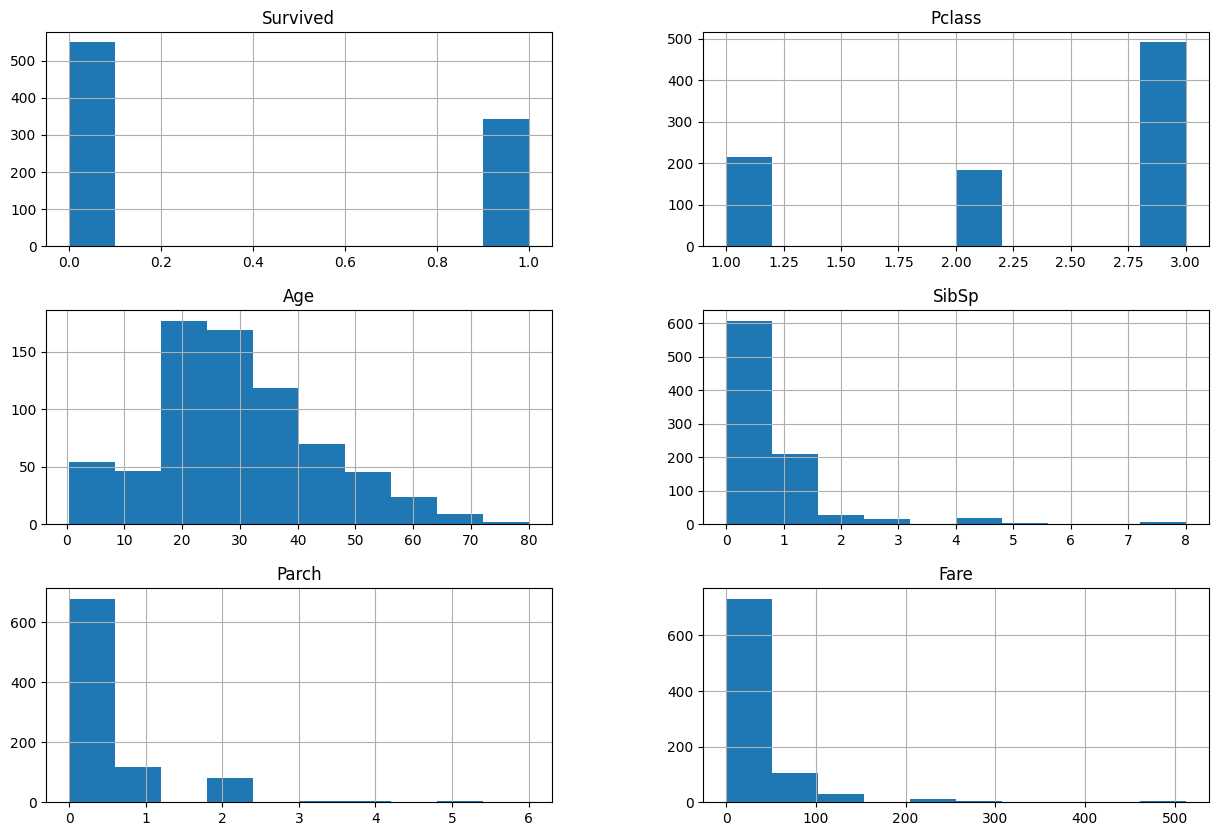

In [7]:
df_copy.drop(columns='PassengerId').hist(figsize=(15,10))
plt.show()

In [8]:
df_copy.duplicated().sum()

0

In [9]:
df_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
def identify_columns_to_drop(df_copy, threshold=0.70):
    columns_to_drop = []
    for col in df_copy.columns:
        missing_percentage = df_copy[col].isnull().sum() / len(df_copy)
        if missing_percentage > threshold:
            columns_to_drop.append(col)

    return columns_to_drop

result_train = identify_columns_to_drop(df_copy)
print("Columns to drop in the train dataset:", result_train)

columns_to_drop = identify_columns_to_drop(df_copy)
df_copy.drop(columns=columns_to_drop, inplace=True)

Columns to drop in the train dataset: ['Cabin']


In [11]:
def impute_with_mean_and_mode(df_copy, column_names):
    for column_name in column_names:
        if df_copy[column_name].dtype == 'object':
            imputation_value = df_copy[column_name].mode()[0]
            df_copy[column_name].fillna(imputation_value, inplace=True)
        else:
            imputation_value = df_copy[column_name].mean()
            df_copy[column_name].fillna(imputation_value, inplace=True)

cols = ['Age','Embarked']  # Columns to impute with mean for Age, and mode for categorical column 'Embarked'

# Impute columns in df
impute_with_mean_and_mode(df_copy, cols)

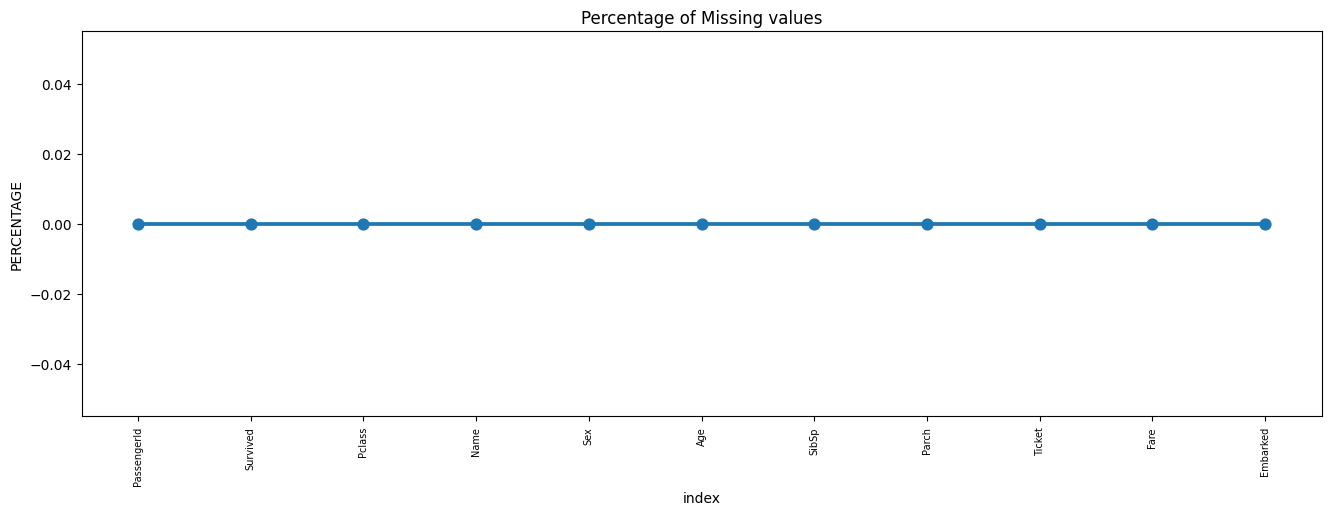

In [12]:
def visualize_missing_percentage(df_copy):
    missing = pd.DataFrame((df_copy.isnull().sum()) * 100 / df_copy.shape[0]).reset_index()

    # Plot the percentage of missing values
    plt.figure(figsize=(16, 5))
    ax = sns.pointplot(x='index', y=0, data=missing)
    plt.xticks(rotation=90, fontsize=7)
    plt.title("Percentage of Missing values")
    plt.ylabel("PERCENTAGE")
    plt.show()
    
visualize_missing_percentage(df_copy)

In [13]:
df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## __Survived col__

In [14]:
df_copy['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

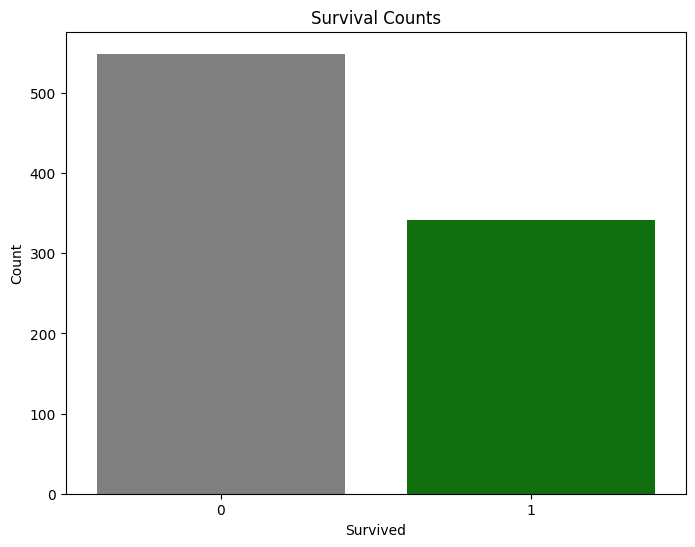

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='Survived', hue='Survived', palette=['grey', 'green'],legend=False)
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

__0 - Not Survived__

__1 - Survived__

__62% of the people did not survive__

**The dataset has a class imbalance issue which will be handled before model training to prevent any biases to the more prevalent class**

## __Gender Col__

In [16]:
sex_df = df_copy['Sex'].value_counts()
sex_pct_df = df_copy['Sex'].value_counts(normalize=True)

result_df = pd.concat([sex_df, sex_pct_df], axis=1)
result_df.columns = ['Count', 'Percentage']

result_df

,Count,Percentage
Sex,,
male,577,0.647587
female,314,0.352413


__There are more males than females in the dataset.__

__64% of the people are males__

In [17]:
df_copy.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


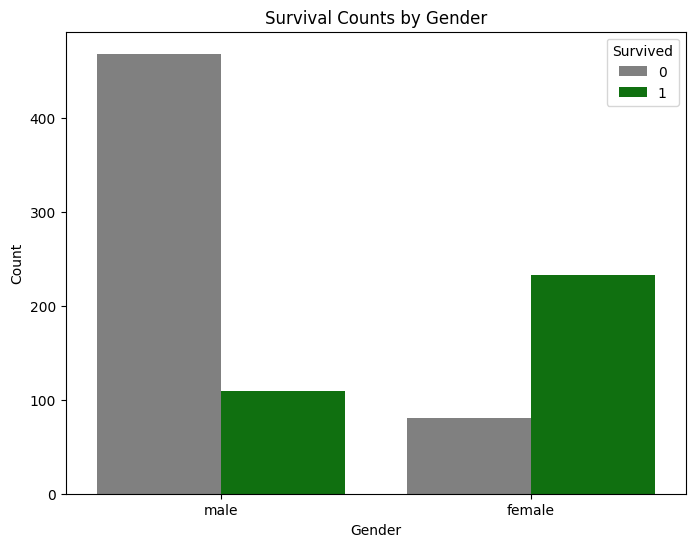

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='Sex', hue='Survived', palette=['grey', 'green'],legend=True)
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

__Most of the people who did not survive were males__

__Most of the people who survived were females__

__Seems like females and children were given first priority to be saved, then male adults were later considered__

## __Passenger Class Col__

In [19]:
class_df = df_copy['Pclass'].value_counts()
class_pct_df = df_copy['Pclass'].value_counts(normalize=True)

result_df = pd.concat([class_df, class_pct_df], axis=1)
result_df.columns = ['Count', 'Percentage']

result_df

,Count,Percentage
Pclass,,
3,491,0.551066
1,216,0.242424
2,184,0.206510


**3rd class has most passengers, maybe to provide labour in the cruise ship as they were 55% of the total population in the ship**



In [20]:
df_copy.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


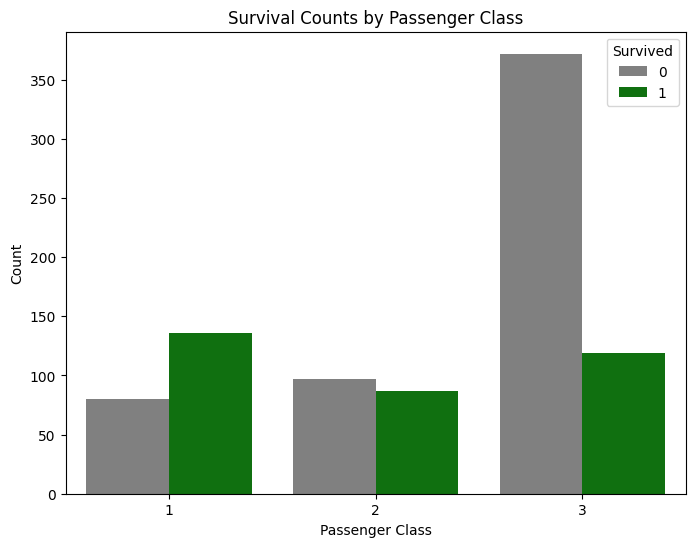

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='Pclass', hue='Survived', palette=['grey', 'green'],legend=True)
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

**Most people who perished were mostly from 3rd class, seems priority to be saved was given according to passenger class**

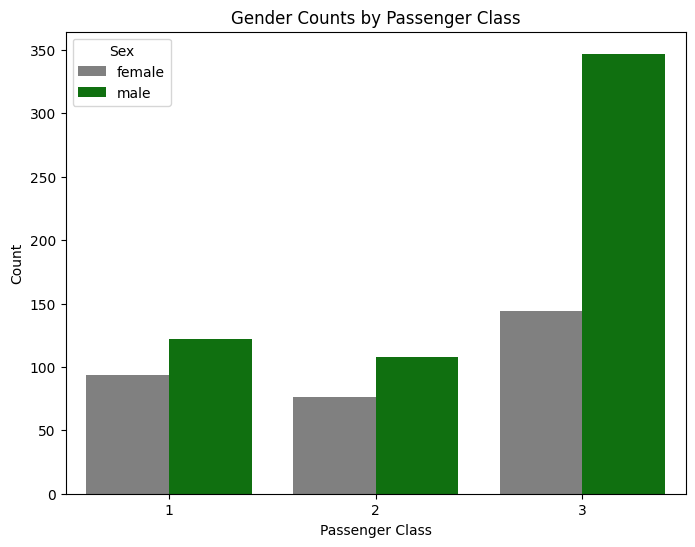

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='Pclass', hue='Sex', palette=['grey', 'green'],legend=True)
plt.title('Gender Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

**3rd class had more males**

## __Sibling-Spouse Col__

In [23]:
df_copy.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


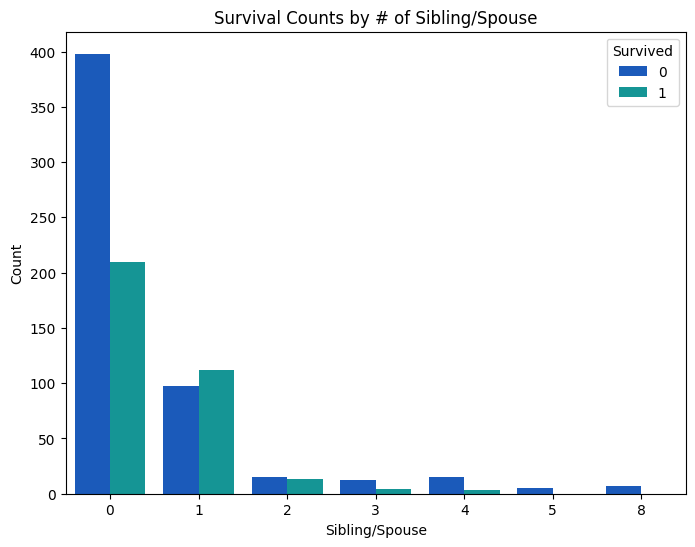

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='SibSp', hue='Survived', palette='winter',legend=True)
plt.title('Survival Counts by # of Sibling/Spouse')
plt.xlabel('Sibling/Spouse')
plt.ylabel('Count')
plt.show()

## __Parent-Children Col__

In [25]:
df_copy.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


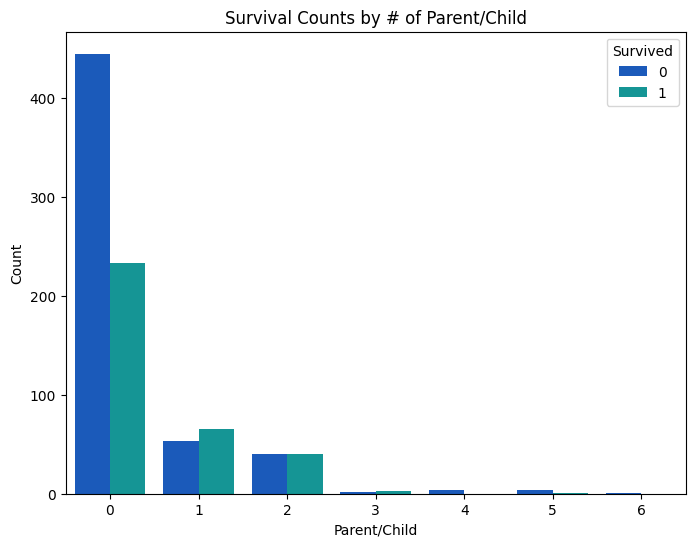

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='Parch', hue='Survived', palette='winter',legend=True)
plt.title('Survival Counts by # of Parent/Child')
plt.xlabel('Parent/Child')
plt.ylabel('Count')
plt.show()

## __Embarked Col__

In [27]:
df_copy.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


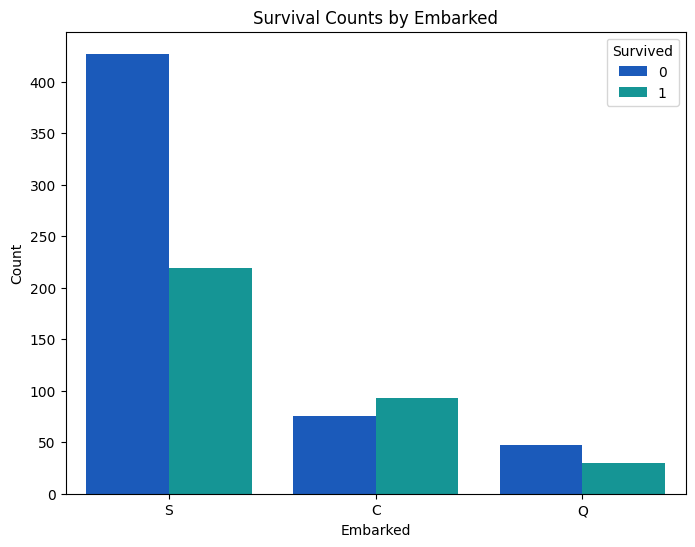

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='Embarked', hue='Survived', palette='winter',legend=True)
plt.title('Survival Counts by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

## __Name Col__

In [29]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
df_copy['Title']=df_copy['Name'].str.split(pat=",",expand=True)[1].str.split(pat=".",expand=True)[0].apply(lambda x:x.strip())

In [31]:
df_copy['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

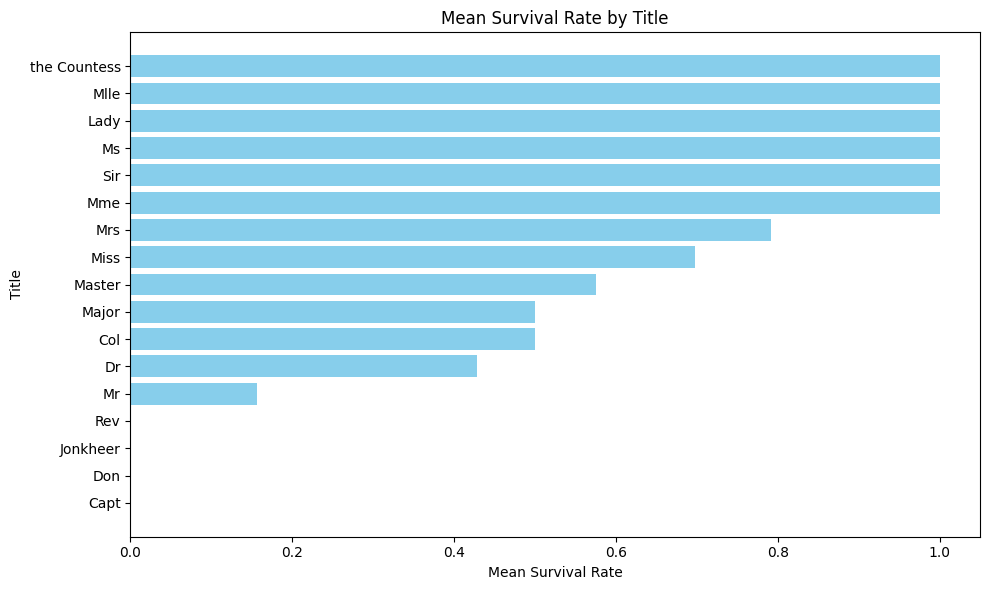

In [32]:
# Group by 'Title' and calculate the mean survival rate
title_survival_mean = df_copy.groupby(['Title'], as_index=False)['Survived'].mean().sort_values(by='Survived')
plt.figure(figsize=(10, 6))
plt.barh(title_survival_mean['Title'], title_survival_mean['Survived'], color='skyblue')
plt.ylabel('Title')
plt.xlabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Title')  
plt.tight_layout()
plt.show()

In [33]:
df_copy['Name_Length'] = df_copy['Name'].apply(lambda x: len(x))

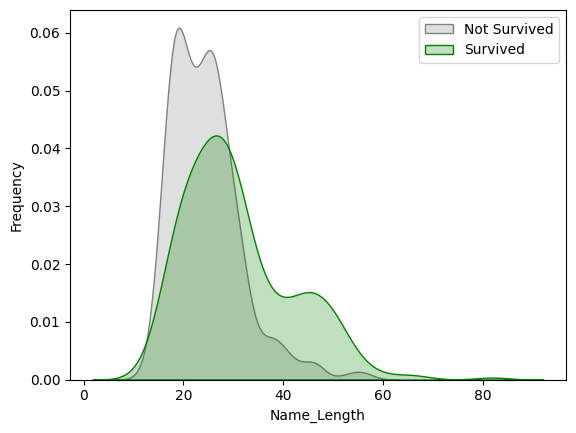

In [34]:
g = sns.kdeplot(df_copy['Name_Length'][(df_copy['Survived']==0) & (df_copy['Name_Length'].notnull())], color='Grey', fill=True)
g = sns.kdeplot(df_copy['Name_Length'][(df_copy['Survived']==1) & (df_copy['Name_Length'].notnull())], ax=g, color='Green', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

## __Age Col__

In [35]:
df_copy['Age'].min(),df_copy['Age'].max()

(0.42, 80.0)

In [36]:
# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80,90]
age_labels = ["{0} - {1}".format(age_bins[i], age_bins[i + 1] - 1) for i in range(len(age_bins) - 1)]

# Create a new column 'Age Group' in your DataFrame
df_copy['age_group'] = pd.cut(df_copy['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the counts of each age group
df_copy['age_group'].value_counts()

age_group
20 - 29    397
30 - 39    167
10 - 19    102
40 - 49     89
0 - 9       62
50 - 59     48
60 - 69     19
70 - 79      6
80 - 89      1
Name: count, dtype: int64

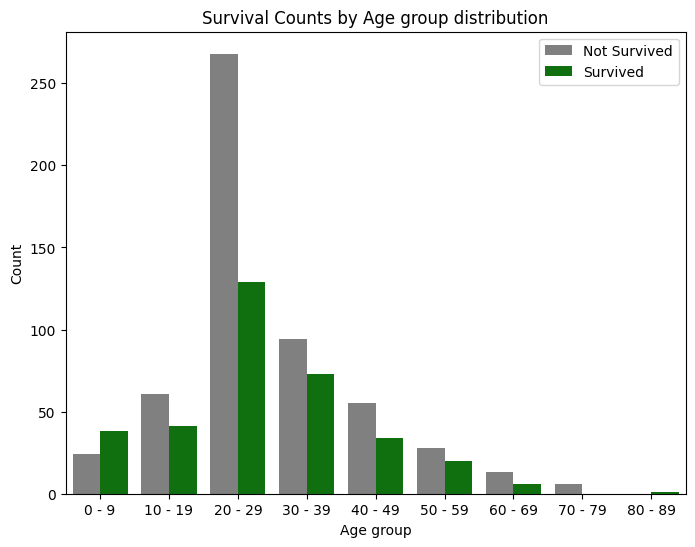

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='age_group', hue='Survived', palette=['grey', 'green'])
plt.title('Survival Counts by Age group distribution')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

## __Fare Col__

In [38]:
df_copy['Fare'].min(),df_copy['Fare'].max()

(0.0, 512.3292)

In [39]:
bins = [0, 100, 200, 300, 400, 500, 600]
fare_labels = ["{0} - {1}".format(bins[i], bins[i + 1] - 1) for i in range(len(bins) - 1)]
df_copy['Fare_Category'] = pd.cut(df_copy['Fare'], bins=bins, labels=fare_labels, right=False)
df_copy['Fare_Category'].value_counts()

Fare_Category
0 - 99       838
100 - 199     33
200 - 299     17
500 - 599      3
300 - 399      0
400 - 499      0
Name: count, dtype: int64

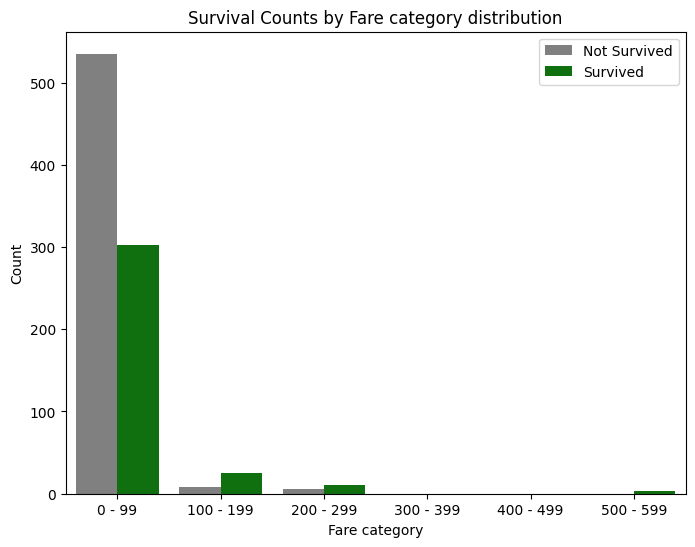

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='Fare_Category', hue='Survived', palette=['grey', 'green'])
plt.title('Survival Counts by Fare category distribution')
plt.xlabel('Fare category')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

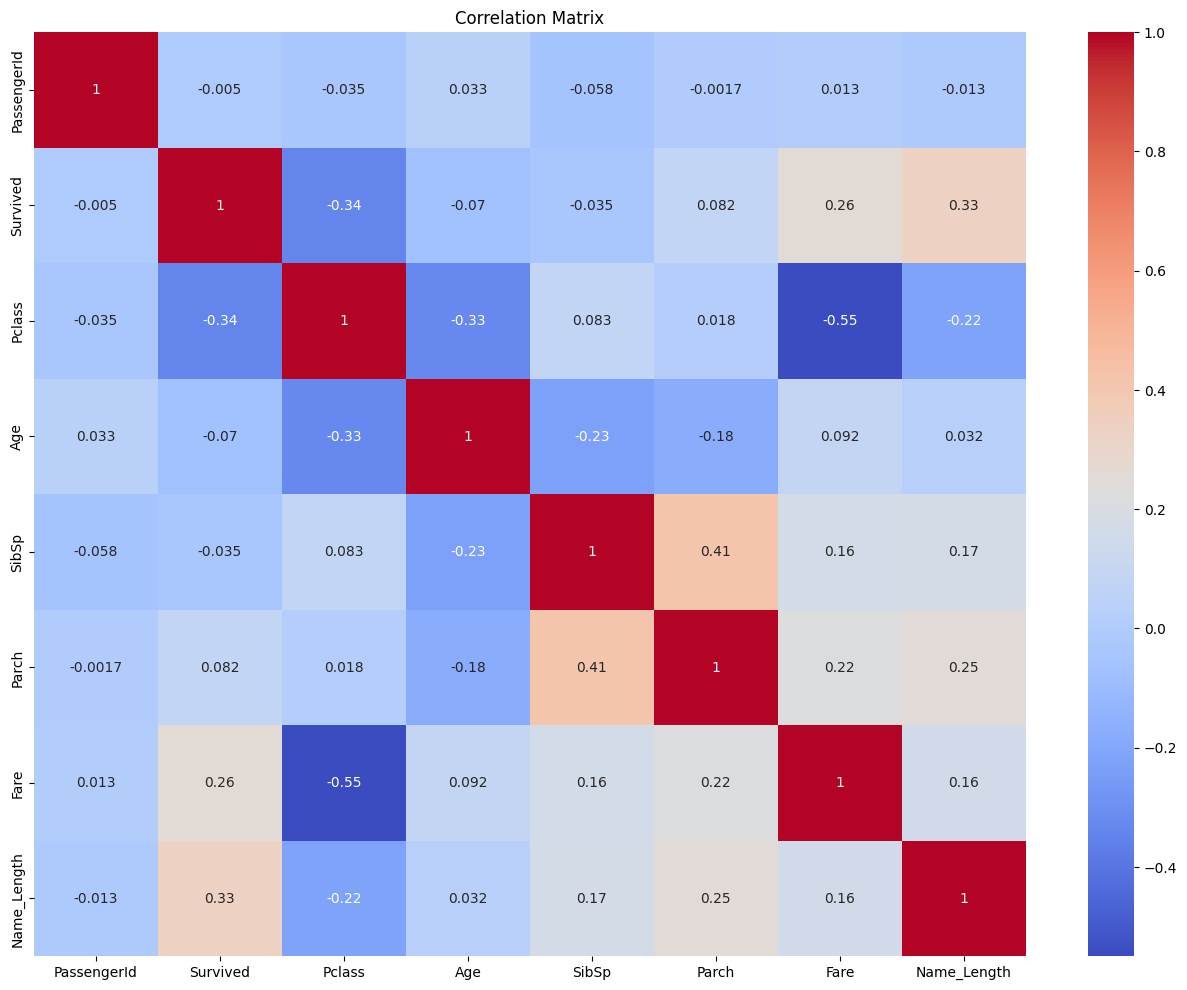

In [41]:
df_corr = df_copy.corr(numeric_only=True)
#Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## __Hypothesis:__

Null Hypothesis (H0): There is no significant association between socio-economic class (Pclass) and survival rates among Titanic passengers.
Alternate Hypothesis (H1): Passengers in higher socio-economic classes were more likely to survive the Titanic disaster.

In [42]:
contingency_table = pd.crosstab(df_copy['Pclass'], df_copy['Survived'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Define significance level
alpha = 0.05

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: There is a significant association between socio-economic class (Pclass) and survival rates.")
else:
    print("Fail to reject null hypothesis: There is no significant association between socio-economic class (Pclass) and survival rates.")


Chi-square statistic: 102.88898875696056
p-value: 4.549251711298793e-23
Reject null hypothesis: There is a significant association between socio-economic class (Pclass) and survival rates.


## __Research Questions__

1. Is there a significant difference in survival rates between passengers from different socio-economic classes?

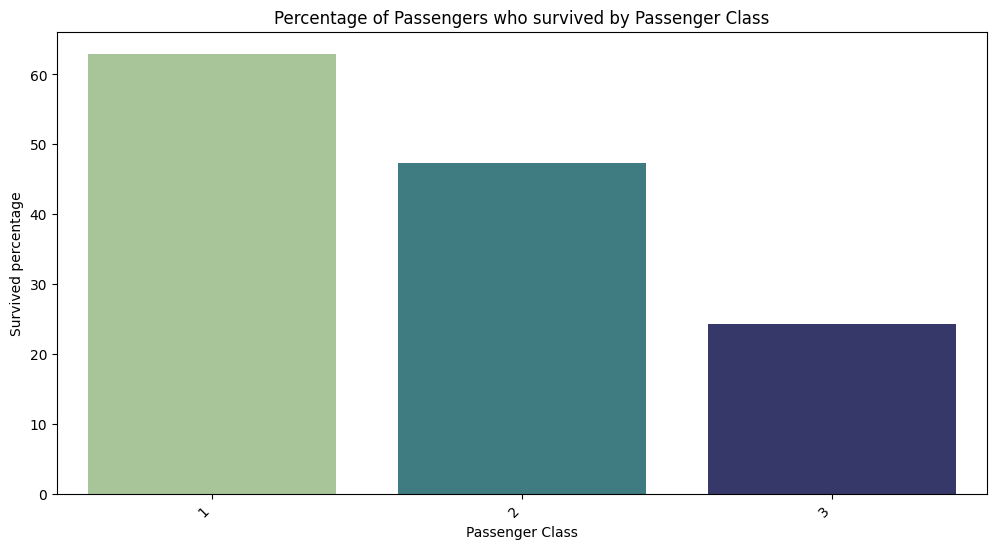

In [43]:
survival_df = df_copy.groupby(['Pclass', 'Survived']).size().reset_index(name='count')

# Calculate the percentage count
total_survival_counts = df_copy.groupby('Pclass').size()
survival_df['percentage'] = (survival_df['count'] / survival_df['Pclass'].map(total_survival_counts) * 100)

# Filter data for individuals above the limit
survived_df = survival_df[survival_df['Survived'] == 1]
survived_df = survived_df.sort_values(by='percentage', ascending=False)

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='percentage', data=survived_df, palette='crest', order=survived_df['Pclass'], hue='Pclass',legend=False)
plt.xlabel('Passenger Class')
plt.ylabel('Survived percentage')
plt.title('Percentage of Passengers who survived by Passenger Class')
plt.xticks(rotation=45, ha='right')
plt.show()

2. What is the relationship between age and survival likelihood among Titanic passengers?

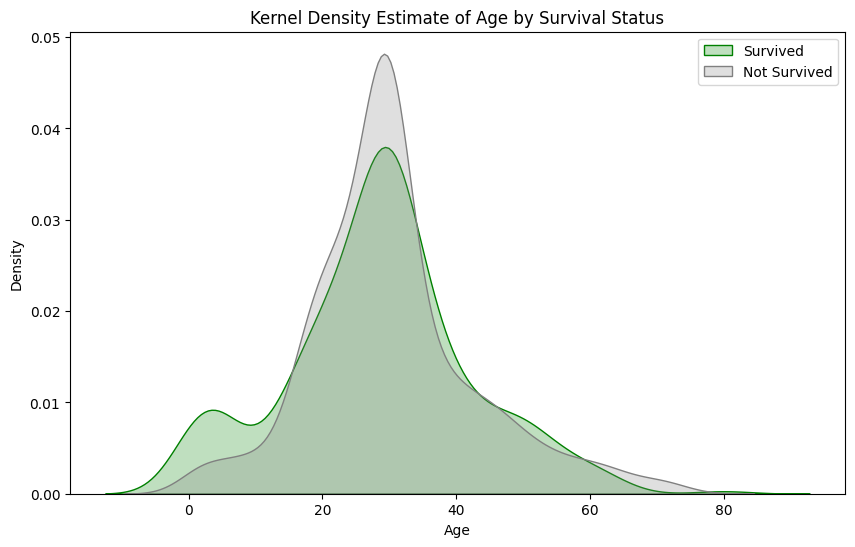

In [44]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_copy[df_copy['Survived'] == 1]['Age'], label='Survived', color='green', fill=True)
sns.kdeplot(data=df_copy[df_copy['Survived'] == 0]['Age'], label='Not Survived', color='grey', fill=True)
plt.title('Kernel Density Estimate of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

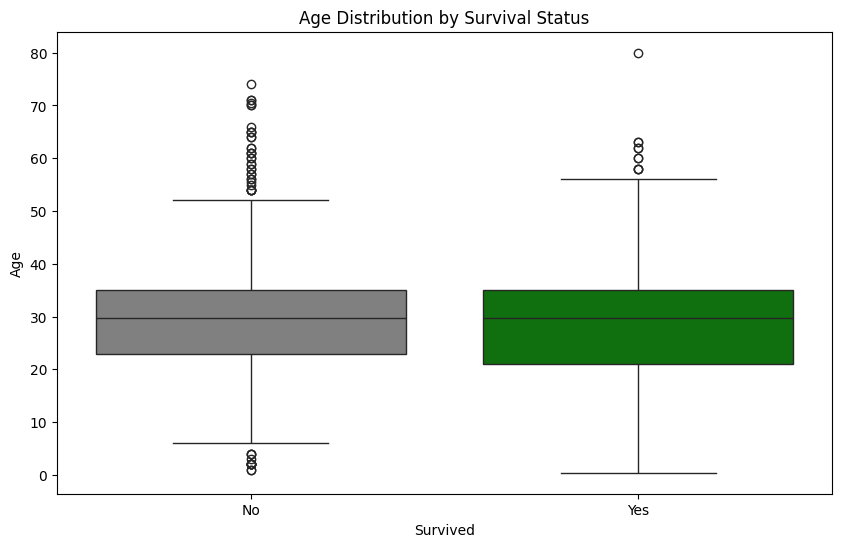

In [45]:
plt.figure(figsize=(10, 6))
# Plot boxplot of age distribution for survivors and non-survivors
sns.boxplot(data=df_copy, x='Survived', y='Age', palette=['grey', 'green'],hue='Survived',legend=False)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

3. Did gender impact the probability of survival during the Titanic disaster?

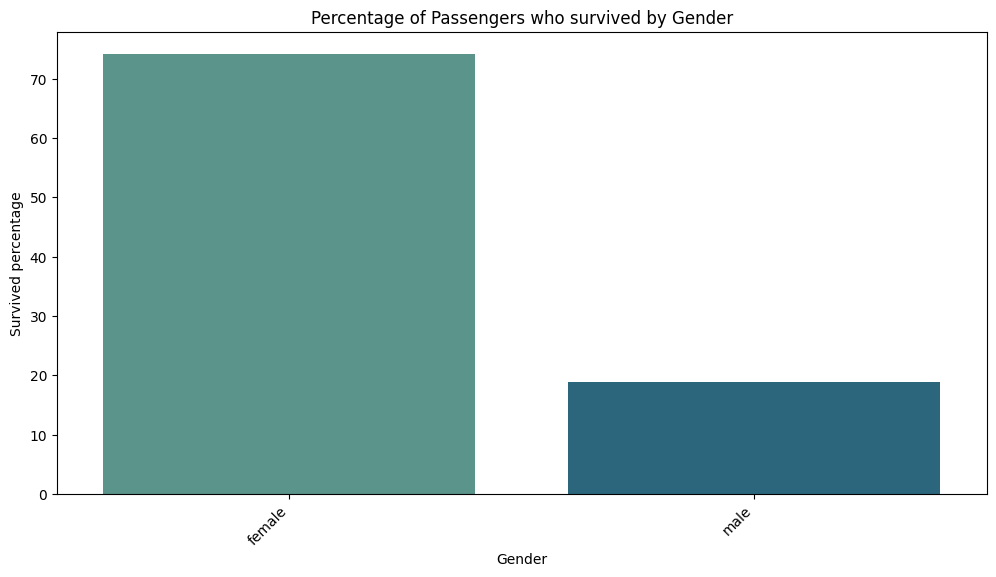

In [46]:
survival_df = df_copy.groupby(['Sex', 'Survived']).size().reset_index(name='count')

# Calculate the percentage count
total_survival_counts = df_copy.groupby('Sex').size()
survival_df['percentage'] = (survival_df['count'] / survival_df['Sex'].map(total_survival_counts) * 100)

# Filter data for individuals above the limit
survived_df = survival_df[survival_df['Survived'] == 1]
survived_df = survived_df.sort_values(by='percentage', ascending=False)

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='percentage', data=survived_df, palette='crest', order=survived_df['Sex'], hue='Sex',legend=False)
plt.xlabel('Gender')
plt.ylabel('Survived percentage')
plt.title('Percentage of Passengers who survived by Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

4. Were passengers traveling with family members (siblings, spouses, parents, children) more likely to survive?

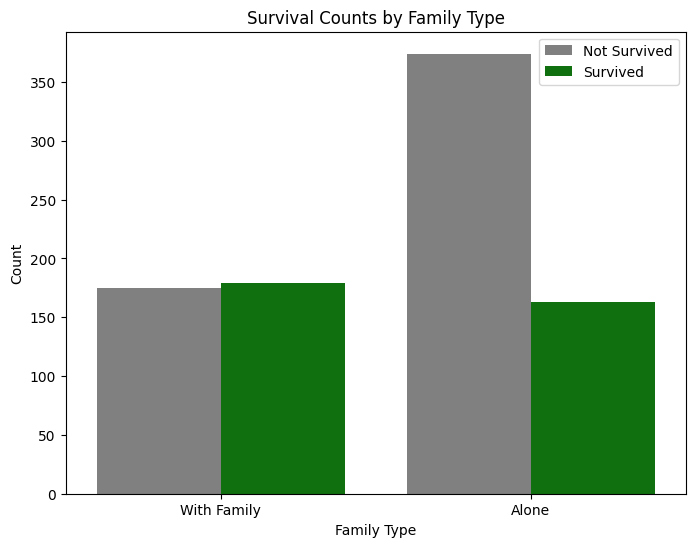

In [47]:
# Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch' columns
df_copy['FamilySize'] = df_copy['SibSp'] + df_copy['Parch'] + 1  # Plus 1 to include the passenger themselves

# Define a function to categorize passengers as 'Alone' or 'With Family'
def categorize_family(size):
    if size == 1:
        return 'Alone'
    else:
        return 'With Family'

df_copy['FamilyType'] = df_copy['FamilySize'].apply(categorize_family)

plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='FamilyType', hue='Survived', palette=['grey', 'green'])
plt.title('Survival Counts by Family Type')
plt.xlabel('Family Type')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

5. Did the port of embarkation influence survival rates?

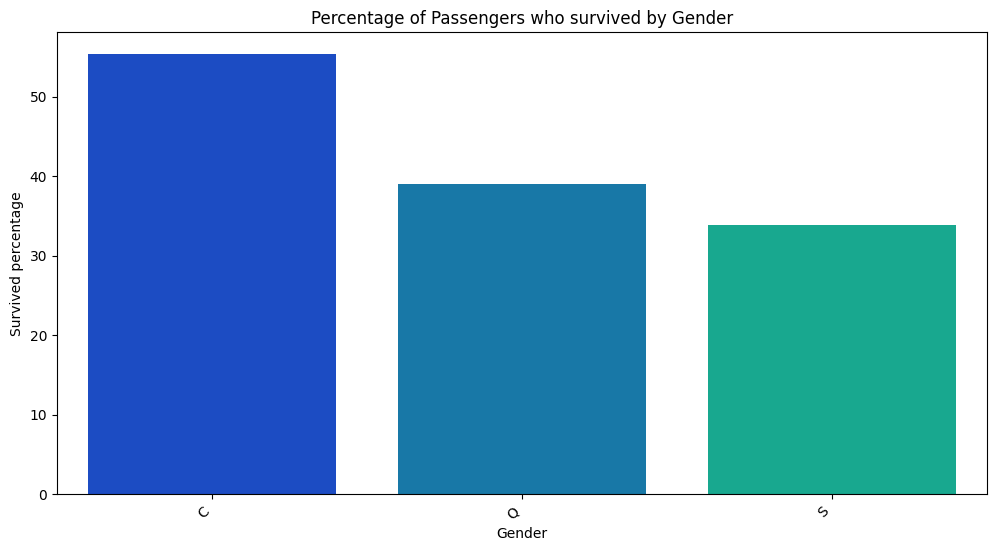

In [48]:
survival_df = df_copy.groupby(['Embarked', 'Survived']).size().reset_index(name='count')

# Calculate the percentage count
total_survival_counts = df_copy.groupby('Embarked').size()
survival_df['percentage'] = (survival_df['count'] / survival_df['Embarked'].map(total_survival_counts) * 100)

# Filter data for individuals above the limit
survived_df = survival_df[survival_df['Survived'] == 1]
survived_df = survived_df.sort_values(by='percentage', ascending=False)

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Embarked', y='percentage', data=survived_df, palette='winter', order=survived_df['Embarked'], hue='Embarked',legend=False)
plt.xlabel('Gender')
plt.ylabel('Survived percentage')
plt.title('Percentage of Passengers who survived by Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

## __Data Preparation & preprocessing__

In [49]:
df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Name_Length',
       'age_group', 'Fare_Category', 'FamilySize', 'FamilyType'],
      dtype='object')

In [50]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Name_Length,age_group,Fare_Category,FamilySize,FamilyType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,23,20 - 29,0 - 99,2,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,51,30 - 39,0 - 99,2,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,22,20 - 29,0 - 99,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,44,30 - 39,0 - 99,2,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,24,30 - 39,0 - 99,1,Alone


In [51]:
df_copy.drop(columns=['Fare_Category','age_group','Title', 'Name_Length','Name','PassengerId','Ticket'],inplace=True)

In [52]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FamilyType
0,0,3,male,22.0,1,0,7.2500,S,2,With Family
1,1,1,female,38.0,1,0,71.2833,C,2,With Family
2,1,3,female,26.0,0,0,7.9250,S,1,Alone
3,1,1,female,35.0,1,0,53.1000,S,2,With Family
4,0,3,male,35.0,0,0,8.0500,S,1,Alone


In [53]:
# Define your features (X) and target variable (y)
X = df_copy.drop('Survived', axis=1)
y = df_copy['Survived']

In [54]:
# Define preprocessing steps for numerical and categorical features
numerical_features = ['Age','Fare','Pclass','SibSp', 'Parch','FamilySize']
binary_features = ['Sex','FamilyType']
nominal_features = ['Embarked']

# Creating transformers for each type of encoding
binary_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary'))
])

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('nominal', nominal_transformer, nominal_features),
        ('log_transformation', FunctionTransformer(np.log1p), numerical_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [56]:
X_train_transformed= pipeline.fit_transform(X_train)
X_test_transformed= pipeline.transform(X_test)

## __Model Training__

In [57]:
# List of models
models = [RandomForestClassifier(),
          KNeighborsClassifier(), 
          SVC(),
          CatBoostClassifier(),
          LogisticRegression(),
          DecisionTreeClassifier(),
          GaussianNB(),
          GradientBoostingClassifier(),
          XGBClassifier(),
          LGBMClassifier()]

metrics = []

# Iterating over models
for model in models:

    # Fit the pipeline on the training data
    model.fit(X_train_transformed, y_train)

    # Predict using the evaluation set
    y_pred = model.predict(X_test_transformed)

    # Calculate the metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    pr = precision_score(y_test, y_pred)
    rc = recall_score(y_test, y_pred)

    # Append the metrics to the list
    metrics.append({"Model": model.__class__.__name__,
                    "Accuracy Score": acc,
                    "F1 Score": f1,
                    "ROC AUC Score": roc,
                    "Precision Score": pr,
                    "Recall Score": rc})

# Creating a DataFrame for the overall performance
overall = pd.DataFrame(metrics)
overall = overall.sort_values(by="F1 Score", ascending=False)
overall_styled = overall.style.background_gradient(cmap="winter")
overall_styled

Learning rate set to 0.008911
0:	learn: 0.6868716	total: 155ms	remaining: 2m 34s
1:	learn: 0.6807689	total: 159ms	remaining: 1m 19s
2:	learn: 0.6748493	total: 162ms	remaining: 53.8s
3:	learn: 0.6692276	total: 165ms	remaining: 41.1s
4:	learn: 0.6630286	total: 168ms	remaining: 33.5s
5:	learn: 0.6572304	total: 172ms	remaining: 28.5s
6:	learn: 0.6525902	total: 174ms	remaining: 24.7s
7:	learn: 0.6475446	total: 177ms	remaining: 21.9s
8:	learn: 0.6435832	total: 179ms	remaining: 19.7s
9:	learn: 0.6383062	total: 182ms	remaining: 18s
10:	learn: 0.6331433	total: 185ms	remaining: 16.6s
11:	learn: 0.6291260	total: 187ms	remaining: 15.4s
12:	learn: 0.6241429	total: 191ms	remaining: 14.5s
13:	learn: 0.6192304	total: 194ms	remaining: 13.6s
14:	learn: 0.6145476	total: 196ms	remaining: 12.9s
15:	learn: 0.6099032	total: 199ms	remaining: 12.2s
16:	learn: 0.6051222	total: 203ms	remaining: 11.7s
17:	learn: 0.6018261	total: 206ms	remaining: 11.2s
18:	learn: 0.5970070	total: 211ms	remaining: 10.9s
19:	learn: 

,Model,Accuracy Score,F1 Score,ROC AUC Score,Precision Score,Recall Score
0,RandomForestClassifier,0.815642,0.744186,0.793281,0.800000,0.695652
4,LogisticRegression,0.815642,0.740157,0.790580,0.810345,0.681159
3,CatBoostClassifier,0.815642,0.736000,0.787879,0.821429,0.666667
8,XGBClassifier,0.787709,0.724638,0.775955,0.724638,0.724638
7,GradientBoostingClassifier,0.804469,0.715447,0.773386,0.814815,0.637681
9,LGBMClassifier,0.782123,0.711111,0.766008,0.727273,0.695652
2,SVC,0.793296,0.708661,0.766996,0.775862,0.652174
5,DecisionTreeClassifier,0.765363,0.691176,0.749671,0.701493,0.681159
1,KNeighborsClassifier,0.765363,0.676923,0.741568,0.721311,0.637681
6,GaussianNB,0.715084,0.643357,0.706061,0.621622,0.666667


In [58]:
# List of models
models = [LogisticRegression(), CatBoostClassifier(),
          RandomForestClassifier()]

# Iterating over models
for model in models:

    # Fit the model
    model.fit(X_train_transformed, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_transformed)

    # Print the classification report
    print("Model: ", model.__class__.__name__)
    print("Classification Report: \n", classification_report(y_test, y_pred))

    # Generate and display the confusion matrix
    fig = px.imshow(confusion_matrix(y_test, y_pred), color_continuous_scale='twilight',
                    title="Confusion Matrix of " + model.__class__.__name__,
                    labels=dict(x="Predicted", y="Actual", color="Counts"),
                    color_continuous_midpoint=0.8, width=400, height=400,
                    template="plotly_dark", text_auto=True)
    fig.show()

    print("----------------------------------------------------------")

Model:  LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



----------------------------------------------------------
Learning rate set to 0.008911
0:	learn: 0.6868716	total: 8.24ms	remaining: 8.23s
1:	learn: 0.6807689	total: 13.2ms	remaining: 6.57s
2:	learn: 0.6748493	total: 18.7ms	remaining: 6.21s
3:	learn: 0.6692276	total: 24.7ms	remaining: 6.15s
4:	learn: 0.6630286	total: 29.8ms	remaining: 5.94s
5:	learn: 0.6572304	total: 37ms	remaining: 6.13s
6:	learn: 0.6525902	total: 41.6ms	remaining: 5.9s
7:	learn: 0.6475446	total: 47ms	remaining: 5.82s
8:	learn: 0.6435832	total: 52.5ms	remaining: 5.78s
9:	learn: 0.6383062	total: 57.5ms	remaining: 5.69s
10:	learn: 0.6331433	total: 62.5ms	remaining: 5.62s
11:	learn: 0.6291260	total: 67.6ms	remaining: 5.57s
12:	learn: 0.6241429	total: 72.9ms	remaining: 5.53s
13:	learn: 0.6192304	total: 78ms	remaining: 5.5s
14:	learn: 0.6145476	total: 85.7ms	remaining: 5.63s
15:	learn: 0.6099032	total: 91ms	remaining: 5.6s
16:	learn: 0.6051222	total: 96.4ms	remaining: 5.57s
17:	learn: 0.6018261	total: 103ms	remaining: 5.6

----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



----------------------------------------------------------


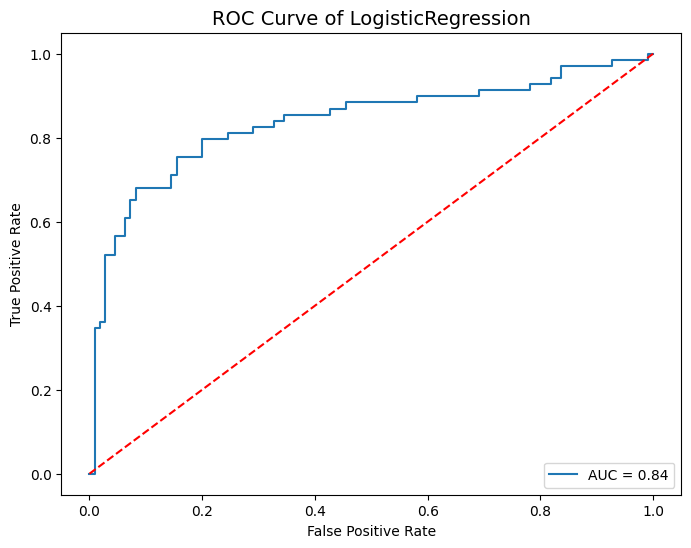

Learning rate set to 0.008911
0:	learn: 0.6868716	total: 13.1ms	remaining: 13.1s
1:	learn: 0.6807689	total: 22ms	remaining: 11s
2:	learn: 0.6748493	total: 31.9ms	remaining: 10.6s
3:	learn: 0.6692276	total: 41.8ms	remaining: 10.4s
4:	learn: 0.6630286	total: 50.5ms	remaining: 10s
5:	learn: 0.6572304	total: 61.7ms	remaining: 10.2s
6:	learn: 0.6525902	total: 69.2ms	remaining: 9.81s
7:	learn: 0.6475446	total: 79.2ms	remaining: 9.82s
8:	learn: 0.6435832	total: 88.2ms	remaining: 9.71s
9:	learn: 0.6383062	total: 96.8ms	remaining: 9.58s
10:	learn: 0.6331433	total: 106ms	remaining: 9.57s
11:	learn: 0.6291260	total: 112ms	remaining: 9.23s
12:	learn: 0.6241429	total: 123ms	remaining: 9.3s
13:	learn: 0.6192304	total: 131ms	remaining: 9.24s
14:	learn: 0.6145476	total: 142ms	remaining: 9.35s
15:	learn: 0.6099032	total: 152ms	remaining: 9.36s
16:	learn: 0.6051222	total: 161ms	remaining: 9.32s
17:	learn: 0.6018261	total: 172ms	remaining: 9.39s
18:	learn: 0.5970070	total: 181ms	remaining: 9.37s
19:	lear

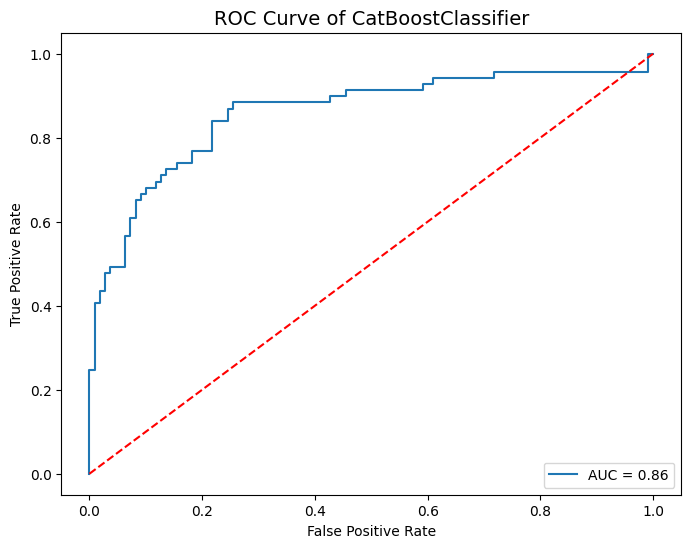

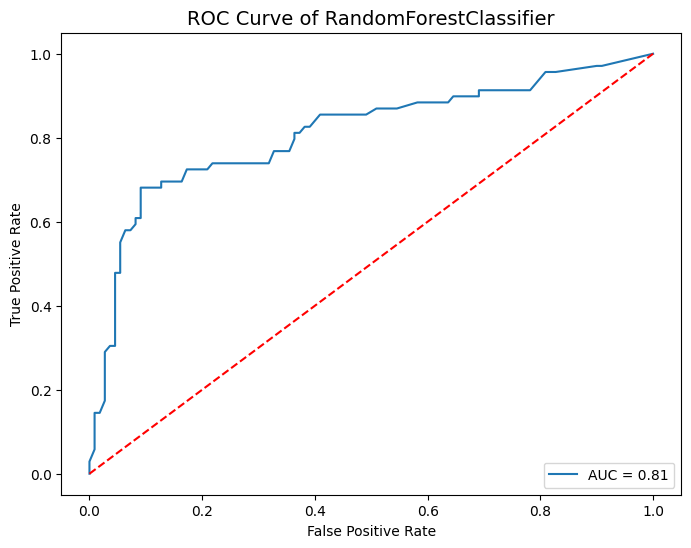

In [59]:
# List of models
models = [LogisticRegression(), CatBoostClassifier(),
         RandomForestClassifier()]

# Iterating over models
for model in models:

    # Fit the model on your training data before making predictions
    model.fit(X_train_transformed, y_train)
    
    # ROC Curve:
    y_prob = model.predict_proba(X_test_transformed)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc_score(y_test, y_prob))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.legend(loc='lower right')
    plt.title("ROC Curve of " + model.__class__.__name__, size=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [63]:
log_clf = LogisticRegression()
log_clf.fit(X_train_transformed,y_train)

LogisticRegression()

In [65]:
# Save the pipeline to a file
with open('Assets/pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


# Save the Encoder to a file 
with open('Assets/log_clf.pkl', 'wb') as file:
    pickle.dump(log_clf, file)